In [14]:
import sys
import os
import collections
from collections import defaultdict
import numpy as np
import pandas as pd
from scipy import stats
import re

In [15]:
cs_file = "./data/csv/Final.csv"
data = pd.read_csv(cs_file)
data.shape

(485250, 20)

In [16]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,University Of Waterloo,Systems Design Engineering,MS,NaN,Accepted,Website,"(1, 7, 2019)",1.561964e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(10, 7, 2019)",1562742000,NaN
1,Northeastern University,Electrical Engineering,PhD,F19,Rejected,Website,"(8, 7, 2019)",1.562569e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 7, 2019)",1562742000,Got email today!
2,The University Of Auckland,Electrical And Electronic Engineering,MS,NaN,Accepted,Website,"(19, 6, 2019)",1.560928e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(9, 7, 2019)",1562655600,Top Student\nIELTS: 7.5\nContacted Supervisor\...
3,Radford University,Counseling Psychology PsyD.,Other,F19,Accepted,Phone,"(4, 3, 2019)",1.551686e+09,NaN,NaN,NaN,NaN,NaN,NaN,American,"(9, 7, 2019)",1562655600,NaN
4,University Of Chittagong,Computer Science,MS,NaN,NaN,Other,"(9, 7, 2019)",1.562656e+09,3.2,163.0,168.0,4.0,True,NaN,International,"(9, 7, 2019)",1562655600,NaN


In [17]:
data.columns = ['univName', 'major', 'program', 'season', 'decision', 'Method', 'decdate', 'decdate_ts', 'cgpa', 'greV', 'greQ', 
           'greA', 'is_new_gre', 'gre_subject','status', 'post_data', 'post_timestamp', 'comments']
data.head()

,univName,major,program,season,decision,Method,decdate,decdate_ts,cgpa,greV,greQ,greA,is_new_gre,gre_subject,status,post_data,post_timestamp,comments
0,University Of Waterloo,Systems Design Engineering,MS,NaN,Accepted,Website,"(1, 7, 2019)",1.561964e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(10, 7, 2019)",1562742000,NaN
1,Northeastern University,Electrical Engineering,PhD,F19,Rejected,Website,"(8, 7, 2019)",1.562569e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 7, 2019)",1562742000,Got email today!
2,The University Of Auckland,Electrical And Electronic Engineering,MS,NaN,Accepted,Website,"(19, 6, 2019)",1.560928e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(9, 7, 2019)",1562655600,Top Student\nIELTS: 7.5\nContacted Supervisor\...
3,Radford University,Counseling Psychology PsyD.,Other,F19,Accepted,Phone,"(4, 3, 2019)",1.551686e+09,NaN,NaN,NaN,NaN,NaN,NaN,American,"(9, 7, 2019)",1562655600,NaN
4,University Of Chittagong,Computer Science,MS,NaN,NaN,Other,"(9, 7, 2019)",1.562656e+09,3.2,163.0,168.0,4.0,True,NaN,International,"(9, 7, 2019)",1562655600,NaN


In [18]:
data = data[data['decision'] =='Accepted']

data.shape

(197058, 18)

In [19]:
data = data[pd.notnull(data['greQ'])]
data.shape

(61474, 18)

In [20]:
data['greQ'] = data['greQ'].fillna(130)
data['greV'] = data['greV'].fillna(130)
data['greA'] = data['greA'].fillna(0)
data.greA.head()

7     4.0
14    3.0
17    5.5
28    4.0
46    4.0
Name: greA, dtype: float64

In [21]:
uni_names = data['univName'].unique()

similar_univs = pd.DataFrame({'univName':uni_names})
similar_univs

,univName
0,New York University (NYU) - Steinhardt
1,Ohio State University
2,Texas A&M University
3,St. Johns University
4,"University Of California, Irvine"
5,Boston University
6,New York University (NYU) Steinhardt
7,University Of Texas Health Science Center At T...
8,Yeshiva University
9,Saarland University


In [22]:
data.describe()

,decdate_ts,cgpa,greV,greQ,greA,gre_subject,post_timestamp
count,6.145400e+04,55589.000000,61474.000000,61474.000000,61474.000000,7175.000000,6.147400e+04
mean,1.431551e+09,3.715970,231.556333,248.826447,4.144757,796.411150,1.431763e+09
std,9.540728e+07,0.506153,174.575147,208.551820,1.111126,122.305977,8.079993e+07
min,-1.000000e+00,0.400000,130.000000,130.000000,0.000000,310.000000,1.263283e+09
25%,1.363244e+09,3.520000,155.000000,157.000000,3.500000,710.000000,1.363417e+09
50%,1.426662e+09,3.750000,161.000000,164.000000,4.000000,800.000000,1.427094e+09
75%,1.490771e+09,3.900000,167.000000,170.000000,5.000000,890.000000,1.491030e+09
max,1.360120e+10,9.990000,800.000000,800.000000,6.000000,990.000000,1.562569e+09


In [23]:
def convert_quant_score(quant_score):
    quant_list = []
    quant_score = quant_score.tolist()
    for old_quant in quant_score:
        if old_quant <= 170:
            quant_list.append(old_quant)
            continue
        else:
            old_quant = old_quant/4.7
            if old_quant <=130:
                quant_list.append(130)
            else:
                quant_list.append(old_quant)
    return quant_list

def convert_verbal_score(verbal_score):
    verbal_list = []
    verbal_score = verbal_score.tolist()
    for old_verbal in verbal_score:
        if old_verbal <= 170:
            verbal_list.append(old_verbal)
            continue
        else:
            old_verbal = old_verbal/4.7
            if old_verbal <=130:
                verbal_list.append(130)
            else:
                verbal_list.append(old_verbal)
    return verbal_list

data['greQ'] = convert_quant_score(data['greQ'])
data['greV'] = convert_verbal_score(data['greV'])


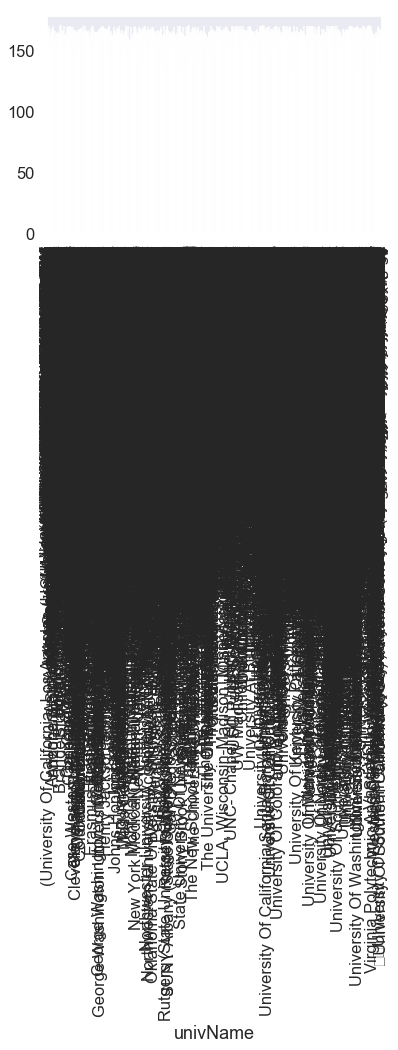

In [47]:
#gre scores
import matplotlib.pyplot as plt
import seaborn as sns

data.groupby('univName')['greV'].mean().plot(kind='bar')
plt.show()

IndexError: single positional indexer is out-of-bounds

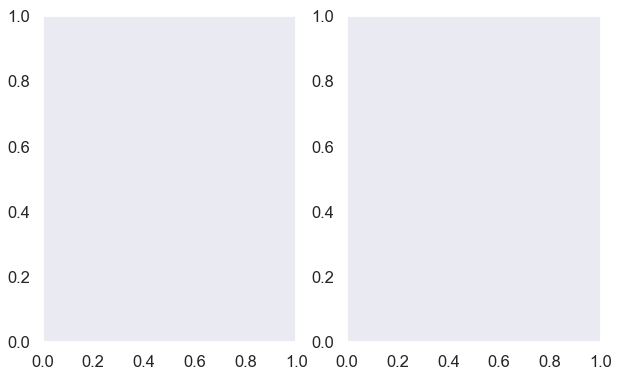

In [32]:
#gre scores
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="dark",context="talk")
f,(ax1, ax2) = plt.subplots(1,2, figsize=(10,6))

#gpa scores
sns.distplot(data.iloc[:,9], ax=ax2, color="g");
plt.xlim(0,300);
plt.ylim(0,None);

sns.distplot(data.iloc[:,10], ax=ax1, color="b");
plt.xlim(0,300)
plt.ylim(0,None)


IndexError: single positional indexer is out-of-bounds

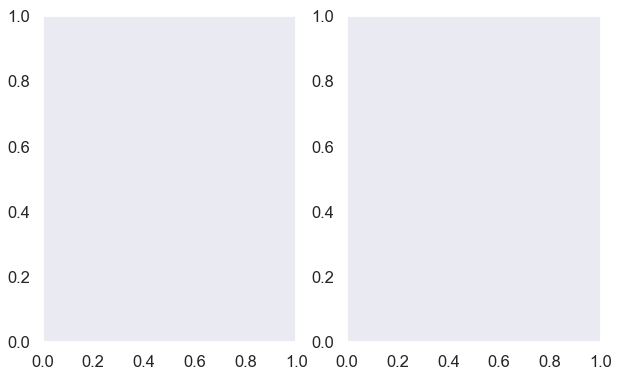

In [33]:
sns.set(style="dark",context="talk")
f,(ax1, ax2) = plt.subplots(1,2, figsize=(10,6))

sns.distplot(data.iloc[:,9], ax=ax1, color="b");
plt.xlim(0,4)


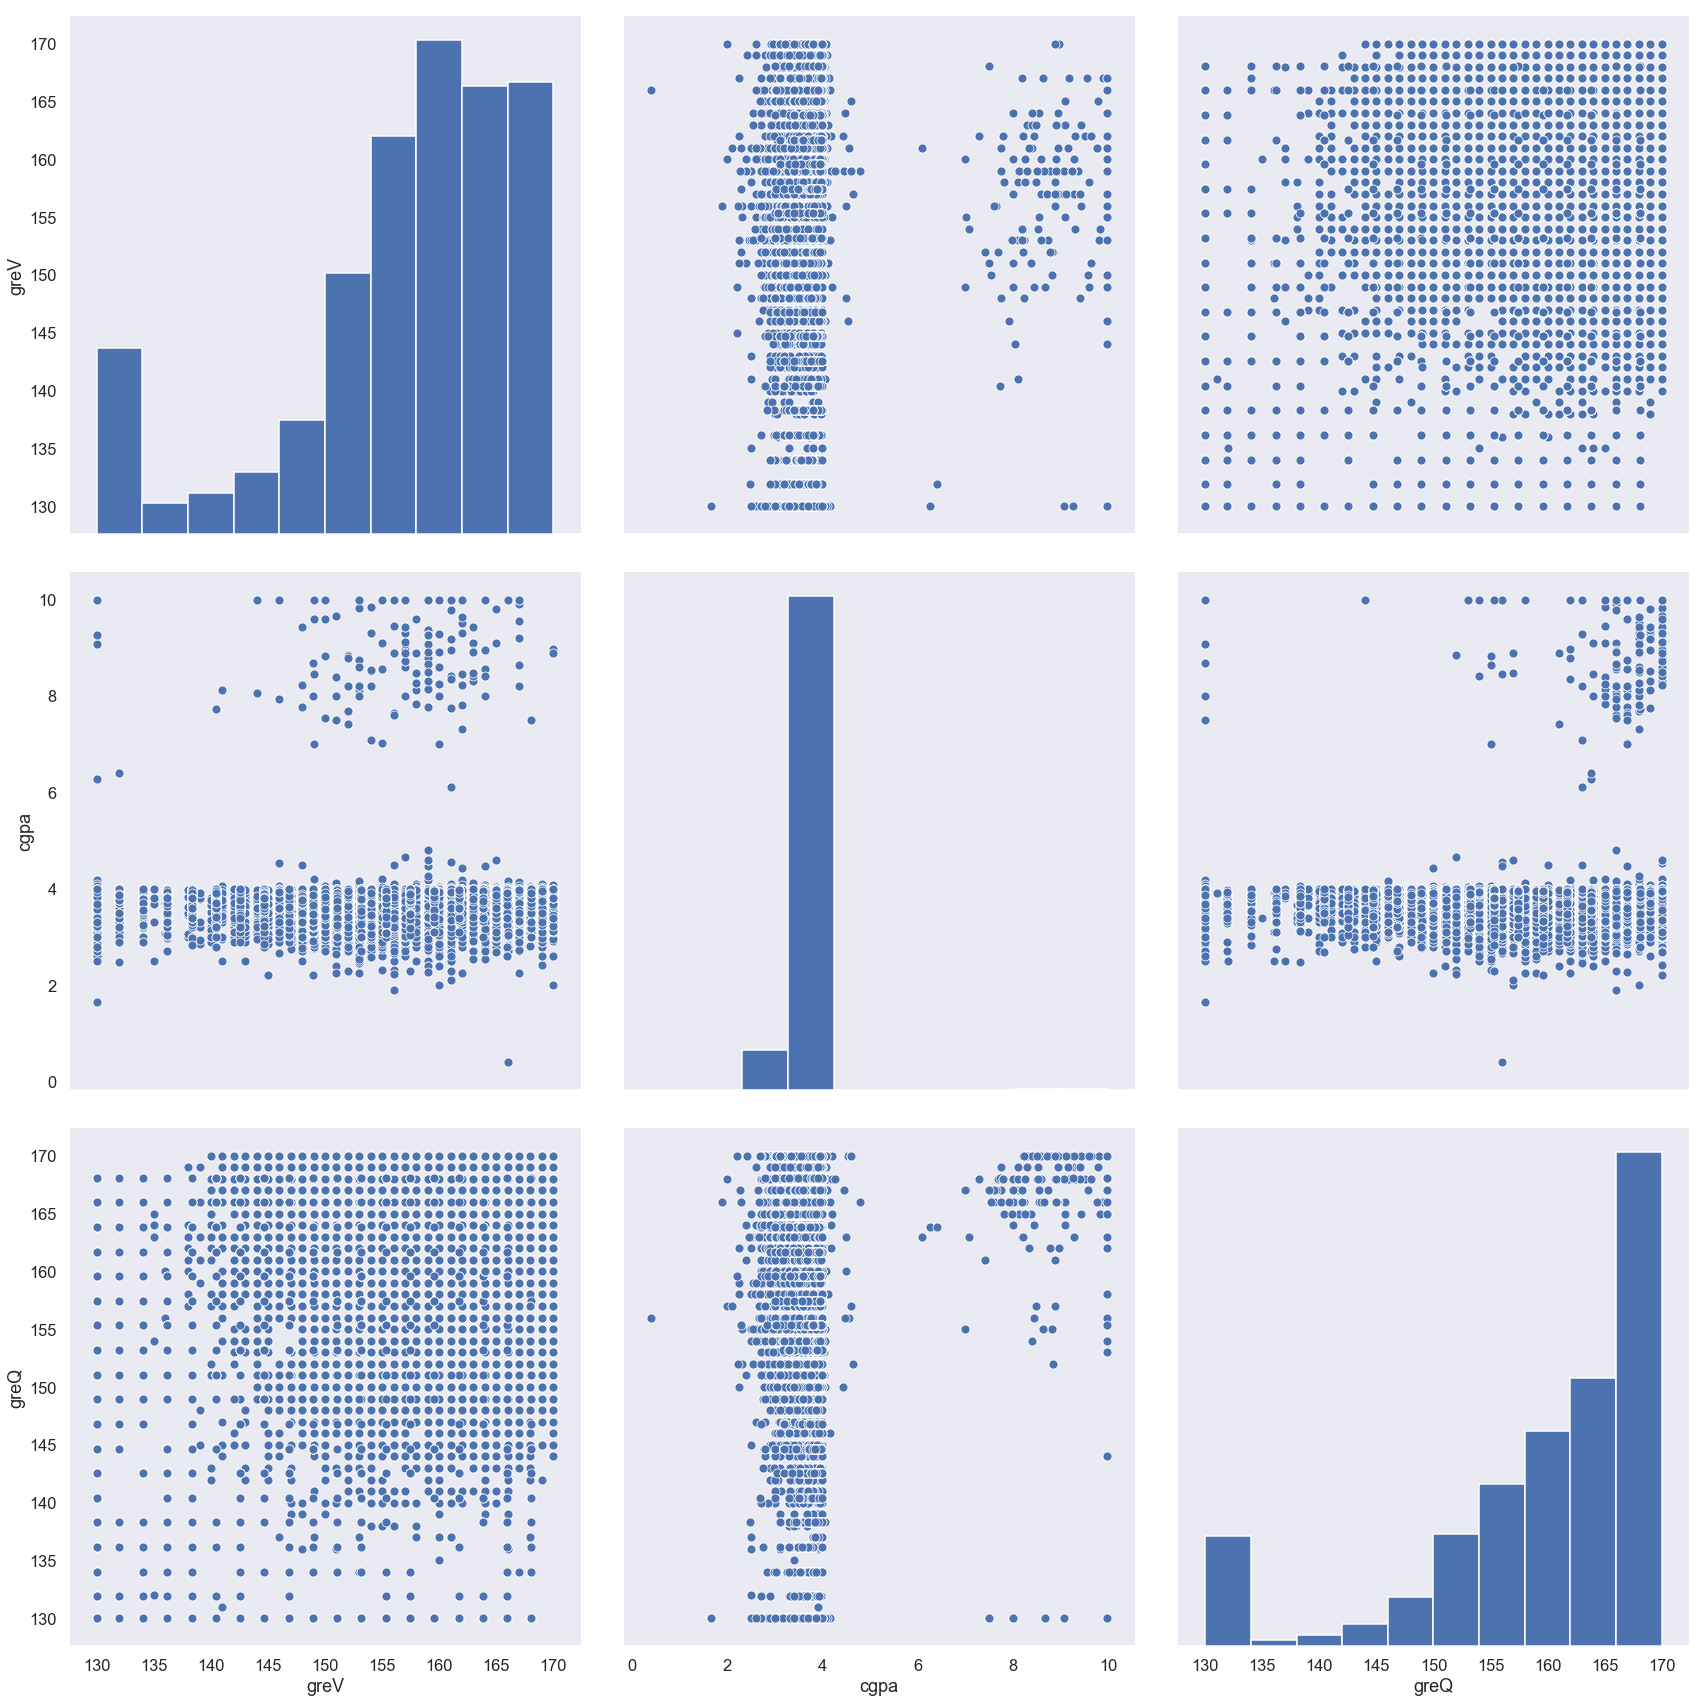

In [34]:
sns.pairplot(data, palette="husl", x_vars=["greV","cgpa","greQ"], y_vars=["greV","cgpa","greQ"], height=8)
plt.show()


In [24]:
def normalize_gpa(data2,cgpa,totalcgpa):
    cgpa = data2[cgpa].tolist()
    totalcgpa = data2[totalcgpa].tolist()
    for i in range(len(cgpa)):
        if totalcgpa[i] != 0:
            cgpa[i] = cgpa[i] / totalcgpa[i]
        else:
            cgpa[i] = 0
    data2['cgpa'] = cgpa
    return data2



In [25]:
data = data.drop('major',1)
data = data.drop('program',1)
data = data.drop('season',1)
data = data.drop('decision',1)
data = data.drop('Method',1)
data = data.drop('decdate',1)
data = data.drop('decdate_ts',1)
data = data.drop('is_new_gre',1)
data = data.drop('gre_subject',1)
data = data.drop('status',1)
data = data.drop('post_data',1)
data = data.drop('post_timestamp',1)
data = data.drop('comments',1)

university_list = list(set(data['univName'].tolist()))
for i in range(len(university_list)):
	if(len(data[data['univName'] == university_list[i]]) < 100):
		data = data[data['univName'] != university_list[i]]
data = data.dropna()

data.head()

,univName,cgpa,greV,greQ,greA
14,Ohio State University,4.00,150.0,166.0,3.0
17,Texas A&M University,3.57,157.0,151.0,5.5
46,"University Of California, Irvine",3.66,155.0,167.0,4.0
64,Boston University,3.10,161.0,157.0,4.0
203,Oregon State University,3.38,154.0,170.0,4.0


In [26]:
processed_data = data[['greV', 'greQ', 'greA', 'cgpa', 'univName']]
processed_data.head()

processed_data.to_csv('./data/csv/Processed_data.csv')

In [27]:
import math
from sklearn import neighbors, datasets
from numpy.random import permutation
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support





In [69]:
#similar_univs = pandas.read_csv('similar_universities.csv')
random_indices = permutation(data.index)
test_cutoff = math.floor(len(data)/5)
print(test_cutoff)
test = processed_data.loc[random_indices[1:test_cutoff]]
train = processed_data.loc[random_indices[test_cutoff:]]
train_output_data = train['univName']
print("train Output data", train_output_data)
train_input_data = train
train_input_data = train_input_data.drop('univName',1)
print("train input data", train_input_data)
test_output_data = test['univName']
print("test Output data", test_output_data)
test_input_data = test
test_input_data = test_input_data.drop('univName',1)
print("test input data", test_input_data)

4994
train Output data 290223                    George Washington University
81763                    University Of Texas At Austin
103579       University Of Texas At Austin (UT Austin)
291152                       Colorado State University
381435                             Stanford University
196503                        University Of Pittsburgh
229165                       Michigan State University
235806    University Of California, Los Angeles (UCLA)
300263                      Carnegie Mellon University
307178                             Stanford University
325289                  University Of Colorado Boulder
243087                             Stanford University
394665        University Of California, Berkeley (UCB)
145187                            Columbia  University
89497       UCSD (University Of California, San Diego)
236063                              Cornell University
45522                             Princeton University
284307                             Columbi

In [70]:
def SVM_classifier(train_input_data,train_output_data,test_input_data,test_output_data):
    clf = svm.SVC()
    clf.fit(train_input_data,train_output_data)
    predicted_output = clf.predict(test_input_data)
    error_list = []
    predicted_output = predicted_output.tolist()
    test_output_data  = test_output_data.tolist()
    for i in range(len(test_output_data)):
        cur_univ_similarities =  similar_univs[similar_univs['univName'] == predicted_output[i]]
        cur_univ_similarity_list = cur_univ_similarities.values.tolist()
        cur_univ_similarity_list = [item for sublist in cur_univ_similarity_list for item in sublist]
        if test_output_data[i] in cur_univ_similarity_list[1:]:
            error_list.append(0)
        else:
            error_list.append(1)
    return predicted_output


In [71]:
output = SVM_classifier(train_input_data,train_output_data,test_input_data,test_output_data)
outputset = set(output)
outputset[:5]


/Users/Sagar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'American University',
 'Arizona State University',
 'Boston University',
 'Brown University',
 'Carnegie Mellon University',
 'Columbia University',
 'Cornell University',
 'Duke University',
 'Florida State University',
 'George Washington University',
 'Georgetown University',
 'Harvard University',
 'Michigan State University',
 'New York University',
 'North Carolina State University',
 'Northeastern University',
 'Northwestern University',
 'Ohio State University',
 'Penn State (Pennsylvania State University)',
 'Princeton University',
 'Purdue University',
 'Rice University',
 'Stanford University',
 'Syracuse University',
 'Temple University',
 'The University Of Chicago',
 'The University Of Wisconsin - Madison',
 'UC Berkeley',
 'UC Davis',
 'UCLA',
 'UCSD',
 'University Of Arizona',
 'University Of California, Los Angeles (UCLA)',
 'University Of California, San Diego (UCSD)',
 'University Of Central Florida',
 'University Of Chicago',
 'University Of Cincinnati',
 'Univers

In [57]:
# Defining a function which calculates euclidean distance between two data points
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

# Defining our KNN model
def knn(trainingSet, testInstance, k):
    print(k)
    distances = {}
    sort = {}
    length = testInstance.shape[1]
    
    #### Start of STEP 3
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
        
        #### Start of STEP 3.1
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        
        distances[x] = dist[0]
        #### End of STEP 3.1
 
    #### Start of STEP 3.2
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=lambda x: x[1])
    #### End of STEP 3.2
 
    neighbors = []
    
    #### Start of STEP 3.3
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    #### End of STEP 3.3
    classVotes = {}
    
    #### Start of STEP 3.4
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    
    #### End of STEP 3.4

    #### Start of STEP 3.5
    sortedVotes = sorted(classVotes.items(), key=lambda x: x[1], reverse=True)
    #print(sortedVotes)
    return(sortedVotes, neighbors)
    #### End of STEP 3.5

In [58]:
# Creating a dummy testset
testSet = [[142, 153, 5.0, 3.6]]
test = pd.DataFrame(testSet)
test.shape

(1, 4)

In [62]:
#### Start of STEP 2
# Setting number of neighbors = 1
k = 7
#### End of STEP 2
# Running KNN model

result,neigh= knn(processed_data, test, k)

# Predicted class

list1 = []
list2 = []
for i in result:
    list1.append(i[0])
    list2.append(i[1])
for i in list1:
    print(i)
    


7
University Of Colorado, Boulder
University Of Florida
University Of Arizona
University Of Pennsylvania (UPenn)
Syracuse University
University Of Texas At Austin
Emory University


In [55]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(processed_data.iloc[:,0:4], data['univName'])

print(neigh.predict(test))

['Syracuse University']


In [93]:
def get_valid_data(tmp):
    return tmp[(tmp["cgpa"]>=0)
            & (tmp["cgpa"]<=4)
            & (tmp["greV"]>=130)
            & (tmp["greV"]<=170)
            & (tmp["greQ"]>=130)
            & (tmp["greQ"]<=170)
            & (tmp["greA"]>=0.0)
            & (tmp["greA"]<=6.0)
           ]

def get_percentile_score(tmp, my_ugrad_gpa, my_gre_verbal, my_gre_quant, my_gre_writing):  
    ugrad_gpa_x = stats.percentileofscore(tmp.cgpa, my_ugrad_gpa)
    gre_verbal_x = stats.percentileofscore(tmp.greV, my_gre_verbal)
    gre_quant_x = stats.percentileofscore(tmp.greQ, my_gre_quant)
    gre_writing_x = stats.percentileofscore(tmp.greA, my_gre_writing)
    
    return ugrad_gpa_x, gre_verbal_x, gre_quant_x, gre_writing_x

def get_match_scores(df, uni_names, my_ugrad_gpa, my_gre_verbal, my_gre_quant, my_gre_writing):
    uni_match = {}
    
    for uni in uni_names:
        tmp = data[(data["univName"]==uni)]
        
        tmp = get_valid_data(tmp)
        
        ugrad_gpa_x, gre_verbal_x, gre_quant_x, gre_writing_x = get_percentile_score(tmp,
                                                                                       my_ugrad_gpa, 
                                                                                       my_gre_verbal, 
                                                                                       my_gre_quant, 
                                                                                       my_gre_writing)

        if len(tmp)>0:
            uni_match[uni] = (ugrad_gpa_x + gre_verbal_x + gre_quant_x + gre_writing_x)/4

        uni_match = sorted(uni_match.items(), key=lambda kv: kv[1], reverse=True)
        uni_match = dict(uni_match)
    
    return uni_match

def get_best_match_univ(uni_match, count):
    i = 0
    for uni in uni_match:
        print("{} : {}".format(uni, uni_match[uni]))
        if count>0 and i==count-1:
            break
        i += 1

In [94]:
def get_university_match_score(tmp, uni, my_ugrad_gpa, my_gre_verbal, my_gre_quant, my_gre_writing, details=False):
    tmp = tmp[(tmp["univName"]==uni)]
    tmp = get_valid_data(tmp)    
    
    print("Undergrad GPA")
    print("-"*30)
    print("Percentile             : {}%".format(stats.percentileofscore(tmp.cgpa, my_ugrad_gpa)))
    if details:
        print("Min                : {} ".format(tmp.cgpa.min()))
        print("Max                : {} ".format(tmp.cgpa.max()))
        print("Mean               : {} ".format(tmp.cgpa.mean()))
        print("Standard Deviation : {} ".format(tmp.cgpa.std()))

    print("\nGRE Verbal")
    print("-"*30)
    print("Percentile             : {}%".format(stats.percentileofscore(tmp.greV, my_gre_verbal)))
    if details:
        print("Min                : {} ".format(tmp.greV.min()))
        print("Max                : {} ".format(tmp.greV.max()))
        print("Mean               : {} ".format(tmp.greV.mean()))
        print("Standard Deviation : {} ".format(tmp.greV.std()))

    print("\nGRE Quant")
    print("-"*30)
    print("Percentile             : {}%".format(stats.percentileofscore(tmp.greQ, my_gre_quant)))
    if details:
        print("Min                : {} ".format(tmp.greQ.min()))
        print("Max                : {} ".format(tmp.greQ.max()))
        print("Mean               : {} ".format(tmp.greQ.mean()))
        print("Standard Deviation : {} ".format(tmp.greQ.std()))

    print("\nGRE Writing")
    print("-"*30)
    print("Percentile             : {}%".format(stats.percentileofscore(tmp.greA, my_gre_writing)))
    if details:
        print("Min                : {} ".format(tmp.greA.min()))
        print("Max                : {} ".format(tmp.greA.max()))
        print("Mean               : {} ".format(tmp.greA.mean()))
        print("Standard Deviation : {} ".format(tmp.greA.std()))
    
    
def get_university_match_stat(tmp, uni):
    tmp = tmp[(tmp["univName"]==uni)]
    tmp = get_valid_data(tmp)    
    
    print("Undergrad GPA")
    print("-"*30)
    print("Min: {}".format(tmp.cgpa.min()))
    print("Max: {}".format(tmp.cgpa.max()))
    print("25%: {}".format(tmp.cgpa.quantile(0.25)))
    print("50%: {}".format(tmp.cgpa.quantile(0.5)))
    print("75%: {}".format(tmp.cgpa.quantile(0.75)))
    print("Mean: {}".format(tmp.cgpa.mean()))
    print("Std: {}".format(tmp.cgpa.std()))

    print("\nGRE Verbal")
    print("-"*30)
    print("Min: {}".format(tmp.greV.min()))
    print("Max: {}".format(tmp.greV.max()))
    print("25%: {}".format(tmp.greV.quantile(0.25)))
    print("50%: {}".format(tmp.greV.quantile(0.5)))
    print("75%: {}".format(tmp.greV.quantile(0.75)))
    print("Mean: {}".format(tmp.greV.mean()))
    print("Std: {}".format(tmp.greV.std()))

    print("\nGRE Quant")
    print("-"*30)
    print("Min: {}".format(tmp.greQ.min()))
    print("Max: {}".format(tmp.greQ.max()))
    print("25%: {}".format(tmp.greQ.quantile(0.25)))
    print("50%: {}".format(tmp.greQ.quantile(0.50)))
    print("75%: {}".format(tmp.greQ.quantile(0.75)))
    print("Mean: {}".format(tmp.greQ.mean()))
    print("Std: {}".format(tmp.greQ.std()))

    print("\nGRE Writing")
    print("-"*30)
    print("Min: {}".format(tmp.greA.min()))
    print("Max: {}".format(tmp.greA.max()))
    print("25%: {}".format(tmp.greA.quantile(0.25)))
    print("50%: {}".format(tmp.greA.quantile(0.50)))
    print("75%: {}".format(tmp.greA.quantile(0.75)))
    print("Mean: {}".format(tmp.greA.mean()))
    print("Std: {}".format(tmp.greA.std()))

In [95]:
#status_list = ['American', 'International', 'International with US Degree', 'Other', np.nan]
#decision_list = ['Accepted', 'Interview', 'Other', 'Rejected', 'Wait listed', np.nan]
uni_names = list(set(data.univName))
uni_names.sort()
uni_names

['Arizona State University',
 'Carnegie Mellon University',
 'Clemson University',
 'Columbia University',
 'Cornell University',
 'George Mason University',
 'Georgia Institute of Technology',
 'Johns Hopkins University',
 'New Jersey Institute of Technology',
 'New York University',
 'North Carolina State University',
 'Northeastern University',
 'Ohio State University Columbus',
 'Purdue University',
 'Rutgers University New Brunswick/Piscataway',
 'SUNY Buffalo',
 'SUNY Stony Brook',
 'Syracuse University',
 'Texas A and M University College Station',
 'University of Arizona',
 'University of California Irvine',
 'University of California Los Angeles',
 'University of California San Diego',
 'University of California Santa Barbara',
 'University of Cincinnati',
 'University of Colorado Boulder',
 'University of Florida',
 'University of Illinois Chicago',
 'University of Illinois Urbana-Champaign',
 'University of Maryland College Park',
 'University of Massachusetts Amherst',
 'Un

In [96]:
major = "Computer Science"
program = "MS"
admit = 1
# season = "F15"


my_ugrad_gpa = 4.00
my_gre_verbal = 142
my_gre_quant = 163
my_gre_writing = 2.5

In [44]:
tmp = data[(data["major"]==major)
         & (data["program"]==program)
         & (data["admit"]==admit)
         
         
#          & (df["season"]==season)
        ]
tmp

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,termAndYear,confPubs,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit
9,amatelia3,Computer Science,0,0,NaN,107.0,MS,Information Technology,NaN,0.0,...,Fall - 2011,0,K J Somaiya College of Engiineering,NaN,71.40,NaN,100,NaN,Worcester Polytechnic Institute,1
11,anujajayku,Computer Science,0,0,NaN,99.0,MS,Electronics,NaN,0.0,...,Fall - 2011,0,RAIT,NaN,65.00,NaN,100,NaN,Worcester Polytechnic Institute,1
12,anujku,Computer Science,0,0,???,99.0,MS,Electronics,NaN,0.0,...,Fall - 2011,0,Ramrao Adik Institute of Technology,NaN,65.00,NaN,100,NaN,Worcester Polytechnic Institute,1
13,anujku007,Computer Science,0,0,NaN,99.0,MS,Electronics,NaN,0.0,...,Fall - 2011,0,Ramrao Adik Institute of Technology,NaN,65.00,NaN,100,NaN,Worcester Polytechnic Institute,1
18,asrivas2,Computer Science,0,0,Networks AI,111.0,MS,Computer Science,NaN,0.0,...,Fall - 2014,0,RGPV,NaN,72.38,NaN,100,NaN,Worcester Polytechnic Institute,1
27,Curio,Computer Science,0,36,NaN,109.0,MS,Computer Science,NaN,0.0,...,Fall - 2014,0,Calicut University,NaN,65.20,NaN,100,NaN,Worcester Polytechnic Institute,1
31,eduserbbm,Computer Science,0,0,Game dev,107.0,MS,Comp Engg,22,0.0,...,Fall - 2013,0,R.G.I.T,NaN,70.00,NaN,100,NaN,Worcester Polytechnic Institute,1
34,greenpepper,Computer Science,0,0,NaN,115.0,MS,Computer Science,NaN,0.0,...,Spring - 2012,0,MG University,NaN,79.00,NaN,100,NaN,Worcester Polytechnic Institute,1
35,gulsher,Computer Science,0,0,Data Warehousing,95.0,MS,Information Technology,22,0.0,...,Spring - 2014,0,UIET Punjab University,NaN,62.00,NaN,100,NaN,Worcester Polytechnic Institute,1
60,PhilipShweta,Computer Science,0,0,Computer Graphics,103.0,MS,Computer Technology,28,0.0,...,Fall - 2014,0,Nagpur University,NaN,67.50,NaN,100,NaN,Worcester Polytechnic Institute,1


In [45]:
uni_match = get_match_scores(tmp, uni_names, my_ugrad_gpa, my_gre_verbal, my_gre_quant, my_gre_writing)
uni_match

{'Worcester Polytechnic Institute': 62.5,
 'Wayne State University': 59.09090909090909,
 'University of Texas Arlington': 57.291666666666664,
 'George Mason University': 56.25,
 'New Jersey Institute of Technology': 55.46875,
 'University of North Carolina Charlotte': 51.74418604651163,
 'California Institute of Technology': 50.0,
 'Clemson University': 49.99999999999999,
 'University of Texas Dallas': 48.574561403508774,
 'Northeastern University': 48.19078947368421,
 'Johns Hopkins University': 45.83333333333333,
 'SUNY Buffalo': 44.84126984126984,
 'University of Florida': 43.87254901960784,
 'University of California Davis': 43.75,
 'University of California Santa Cruz': 43.75,
 'University of Colorado Boulder': 43.75,
 'University of Illinois Chicago': 43.75,
 'Syracuse University': 43.604651162790695,
 'University of Maryland College Park': 43.125,
 'University of Cincinnati': 42.777777777777786,
 'Arizona State University': 42.666666666666664,
 'University of Arizona': 42.567567

In [46]:
count = 10

get_best_match_univ(uni_match, count)

Worcester Polytechnic Institute : 62.5
Wayne State University : 59.09090909090909
University of Texas Arlington : 57.291666666666664
George Mason University : 56.25
New Jersey Institute of Technology : 55.46875
University of North Carolina Charlotte : 51.74418604651163
California Institute of Technology : 50.0
Clemson University : 49.99999999999999
University of Texas Dallas : 48.574561403508774
Northeastern University : 48.19078947368421


In [47]:
uni = "Cornell University"
# uni = "Cornell University"
# uni = "Massachusetts Institute Of Technology (MIT)"

In [33]:
get_university_match_score(tmp, uni, my_ugrad_gpa, my_gre_verbal, my_gre_quant, my_gre_writing, details=False)

Undergrad GPA
------------------------------
Percentile             : 100.0%

GRE Verbal
------------------------------
Percentile             : 0.0%

GRE Quant
------------------------------
Percentile             : 50.0%

GRE Writing
------------------------------
Percentile             : 0.0%


In [ ]:
import matplotlib.pyplot as plt
import requests
import urllib.request
from IPython.core.debugger import Tracer

url_form = "http://thegradcafe.com/survey/index.php?q=u%2A&t=a&pp=250&o=d&p={0}"
DATA_DIR = '/Users/Sagar/Downloads/gradcafe_data-master/data/'

if __name__ == '__main__':
    for i in range(1, 3):
        url = url_form.format(i)
        handle = urllib.request.urlopen(url)
        html = handle.read()
        html = html.decode('utf8')
        #r = requests.get(url)
        fname = "{data_dir}/{page}.html".format(data_dir=DATA_DIR,page=str(i))
        with open(fname, 'wb') as f:
            f.write(html.encode('UTF-8'))
        print("getting {0}...".format(i))

In [ ]:


data['greQ'] = data['greQ'].fillna(130)
data['greV'] = data['greV'].fillna(130)
data['greA'] = data['greA'].fillna(0)
data.greA.head()

